In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head(7)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1


In [4]:
df.shape

(299, 13)

In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
#split  continous and categorical variables 

categorical_variables = df[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]

In [7]:
#statistical summary of the continous variables 
continuous_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [8]:
#we will be predicting deat event so it is important to see the number of death and survival 
df.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


# Visualization 

In [9]:
age = df[['age']]
platelets = df[['platelets']]

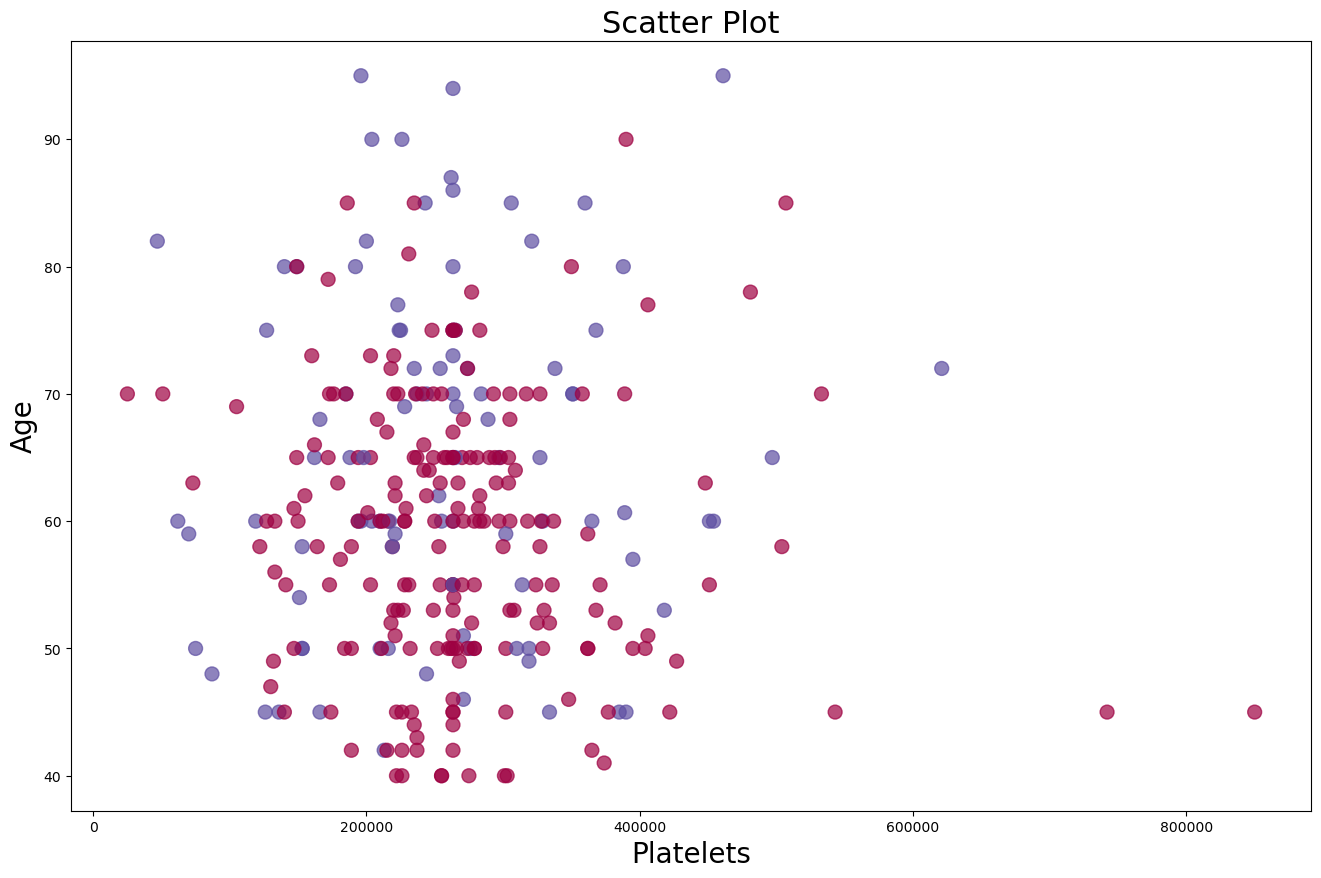

In [10]:
import matplotlib.cm as cm 
plt.figure(figsize=(16,10))
plt.scatter(platelets, age, c = df["DEATH_EVENT"], cmap='Spectral', s=100, alpha=0.7)
plt.xlabel("Platelets", fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Scatter Plot", fontsize=22)
plt.show()

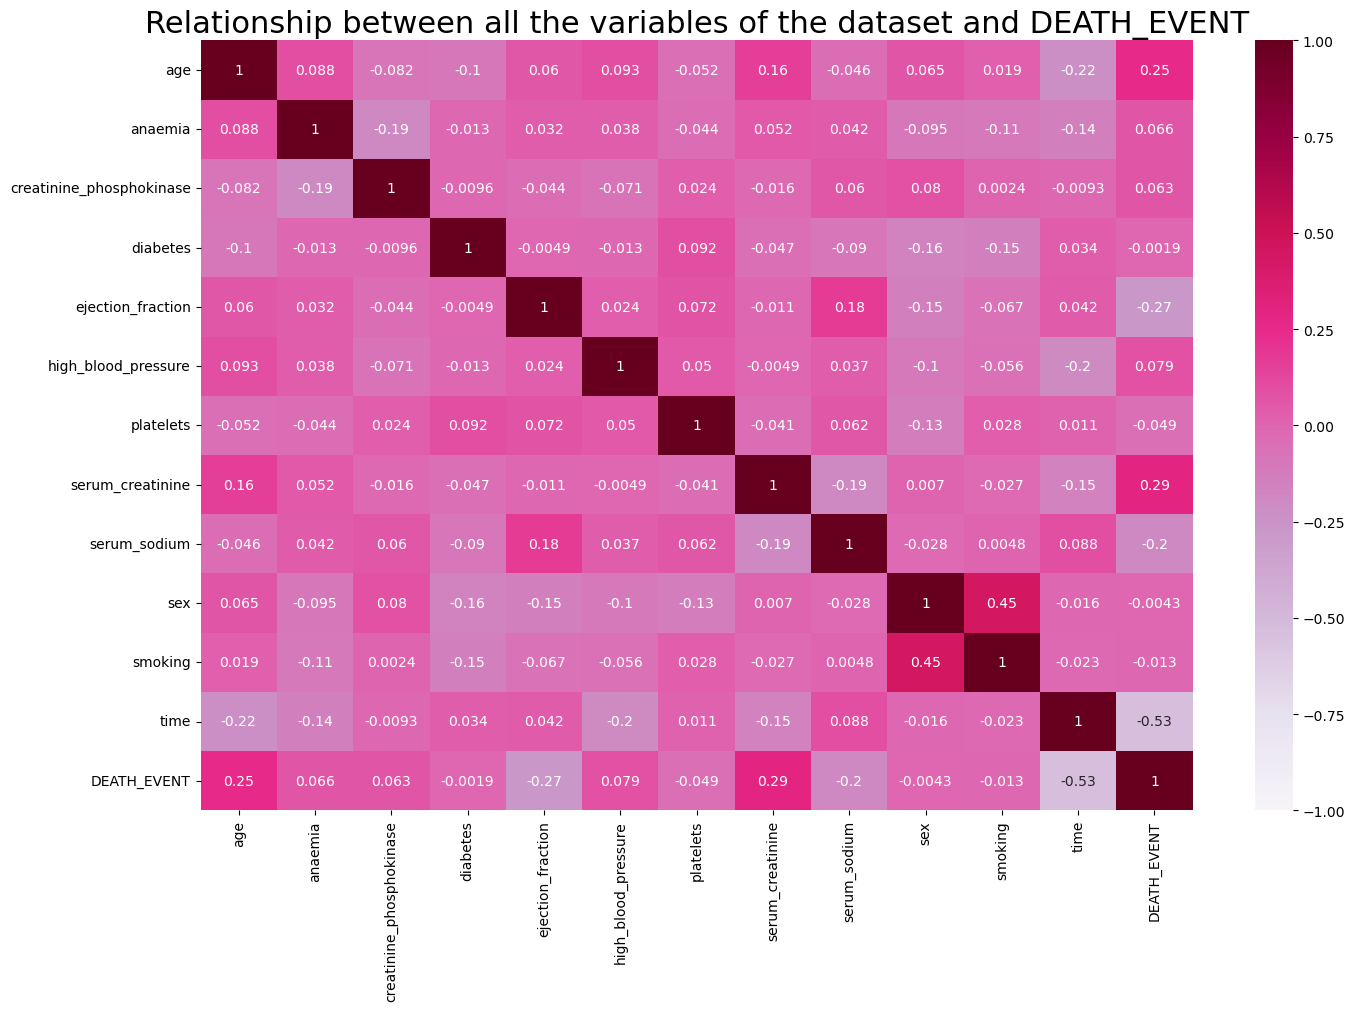

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="PuRd", annot=True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize = 22)
plt.show()

# Note:
We notice that there is a positive correlation between DEATH_EVENT and serum creatinine and age. We have also a negative correlation between DEATH_EVENT and time, ejection fraction and serum sodium a little bit.

In [12]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

In [13]:
#plt.figure(figsize=(13,10))
#plt.subplot(2,2,1)
#sns.countplot(data = df, x= 'anaemia', hue = "DEATH_EVENT", palette="magma")
#plt.subplot(2,2,4)
#sns.countplot(data = df, x= 'diabetes', hue = "DEATH_EVENT", palette="magma")

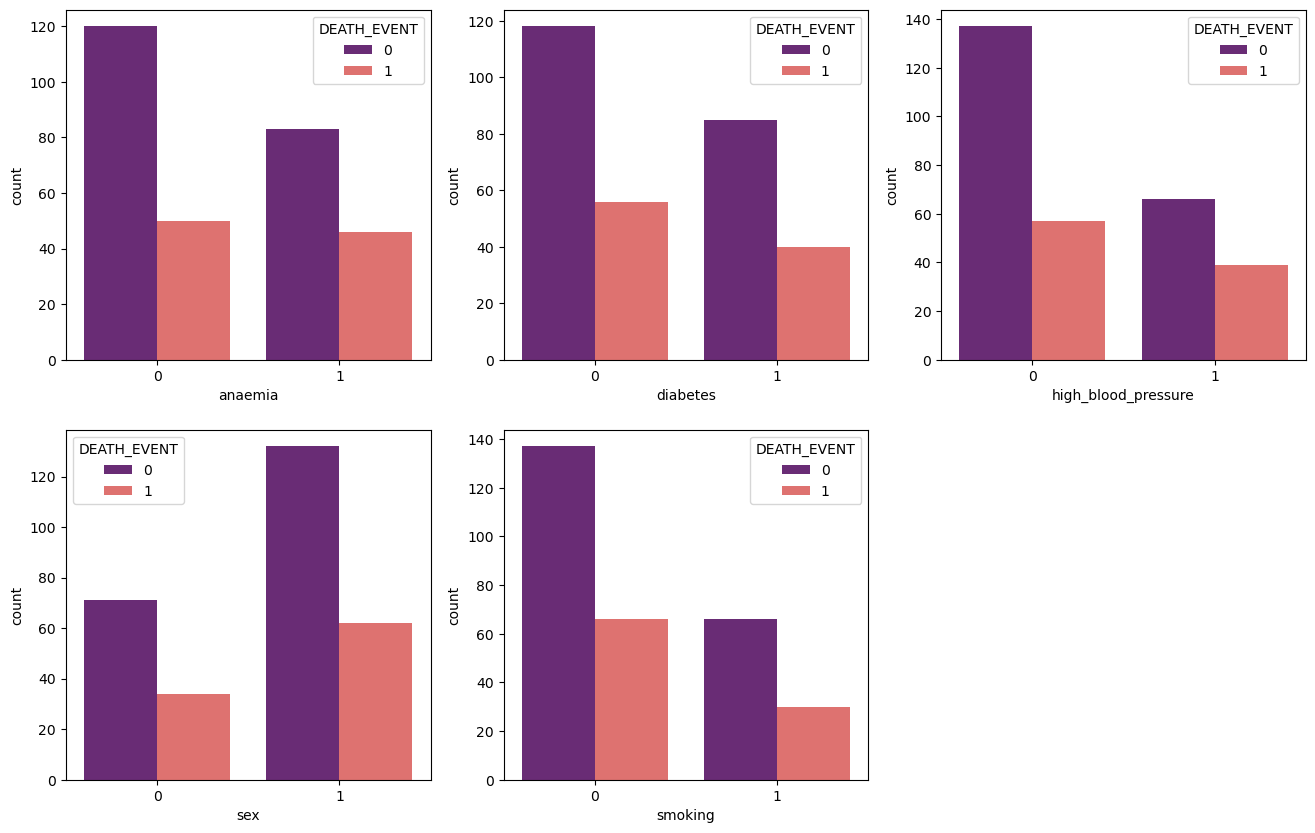

In [14]:
# Plotting the impact of categorical variables on DEATH_EVENT

plt.figure(figsize=(16,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df, x= cat, hue = "DEATH_EVENT", palette="magma")
plt.show()

1 anaemia,
2 diabetes,
3 high_blood_pressure,
4 sex,
5 smoking.

# Data Modeling 

In [15]:
x = df[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y = df["DEATH_EVENT"]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [17]:
# Data scaling
scaler = StandardScaler() #Creates an instance of the StandardScaler class. This object will be used to standardize the data.
x_train_scaled = scaler.fit_transform(x_train) #Returns the scaled training data
x_test_scaled = scaler.transform(x_test) #Returns the scaled test data.


#The code effectively standardizes the features in both the training and test datasets. This ensures that all features have a mean of 0 and a standard deviation of 1,
#which is often beneficial for algorithms that rely on distance calculations or gradient descent.


In [18]:
accuracy_list = [] # A list to save all the values from different models accuracy for comparaison using a bar chart

## Logistic regression

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = round(accuracy_score(y_test, lr_prediction), 4) * 100  # percentage
accuracy_list.append(lr_accuracy)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_prediction))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_prediction))

Logistic Regression Confusion Matrix:
[[40  3]
 [ 5 12]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.80      0.71      0.75        17

    accuracy                           0.87        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.86      0.87      0.86        60



## Decision Tree Classifier

In [20]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = round(accuracy_score(y_test, dt_prediction), 4) * 100  # percentage
accuracy_list.append(dt_accuracy)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_prediction))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_prediction))

Decision Tree Confusion Matrix:
[[43  0]
 [ 6 11]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.65      0.79        17

    accuracy                           0.90        60
   macro avg       0.94      0.82      0.86        60
weighted avg       0.91      0.90      0.89        60



## Random Forest Classifier

In [21]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = round(accuracy_score(y_test, rf_prediction), 4) * 100  # percentage
accuracy_list.append(rf_accuracy)
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_prediction))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_prediction))


Random Forest Confusion Matrix:
[[41  2]
 [ 4 13]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.87      0.76      0.81        17

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.90      0.90      0.90        60



In [22]:

# Print all model accuracies
print("Model Accuracies:", accuracy_list)

Model Accuracies: [86.67, 90.0, 90.0]


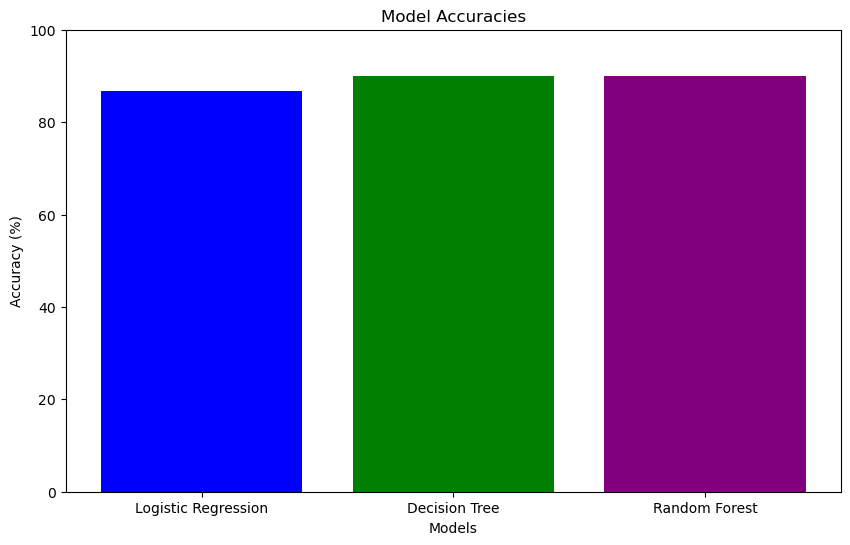

In [23]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_list, color=['blue', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.ylim(0, 100)  # Set y-axis range to 0-100 for better visualization
plt.show()